In [16]:
import numpy as np

# **Simple Coin Toss**

In [17]:
def probability_of_sequence(sequence, bias):
    """Calculate the probability of observing a sequence given the coin bias."""
    return np.prod(bias ** sequence * (1 - bias) ** (1 - sequence))

# Initial guesses for the biases of the two coins
p1, p2 = 0.6, 0.5

# Toss sequences represented as 1 for 'H' and 0 for 'T'
toss_sequences = np.array([[1, 1], [0, 0], [1, 0]])

# Convergence criteria
tolerance = 1e-6
max_iterations = 1000
iterations = 0

while iterations < max_iterations:
    iterations += 1

    # Previous step biases
    p1_old, p2_old = p1, p2

    # E-step: Calculate responsibilities
    # Calculates the likelihood of each sequence given the current bias estimates and uses these to compute the responsibilities.
    likelihoods_1 = np.array([probability_of_sequence(seq, p1) for seq in toss_sequences])
    likelihoods_2 = np.array([probability_of_sequence(seq, p2) for seq in toss_sequences])
    responsibilities_1 = likelihoods_1 / (likelihoods_1 + likelihoods_2)
    responsibilities_2 = likelihoods_2 / (likelihoods_1 + likelihoods_2)

    # M-step: Update p1 and p2
    # Updates the bias estimates for each coin based on these responsibilities.
    p1 = np.sum(responsibilities_1 * toss_sequences.sum(axis=1)) / np.sum(responsibilities_1 * 2)
    p2 = np.sum(responsibilities_2 * toss_sequences.sum(axis=1)) / np.sum(responsibilities_2 * 2)

    # Check for convergence
    if np.abs(p1 - p1_old) < tolerance and np.abs(p2 - p2_old) < tolerance:
        break

print(f"Converged in {iterations} iterations.")
print(f"Estimated Bias of Coin 1: {p1}")
print(f"Estimated Bias of Coin 2: {p2}")


Converged in 24 iterations.
Estimated Bias of Coin 1: 0.7886745573821163
Estimated Bias of Coin 2: 0.21132544261794717


## Longer Sequences, checking if EM actually works

In [18]:
# Generating longer sequences of coin tosses
np.random.seed(42)  # Seed for reproducibility

# Simulate longer sequences of tosses for 2 coins with biases
coin_1_bias = 0.7  # Bias for coin 1 (more likely to land heads)
coin_2_bias = 0.3  # Bias for coin 2 (more likely to land tails)

# Generating sequences
sequences_coin_1 = np.random.binomial(n=1, p=coin_1_bias, size=(100, 10))  # 5 sequences of 10 tosses from coin 1
sequences_coin_2 = np.random.binomial(n=1, p=coin_2_bias, size=(100, 10))  # 5 sequences of 10 tosses from coin 2

# Concatenate sequences for both coins to simulate the mixed sequences we observe
toss_sequences_longer = np.concatenate((sequences_coin_1, sequences_coin_2))

toss_sequences_longer

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [19]:
def probability_of_sequence(sequence, bias):
    """Calculate the probability of observing a sequence given the coin bias."""
    return np.prod( (bias ** sequence) * ((1 - bias) ** (1 - sequence)))

# Initial guesses for the biases of the two coins
p1, p2 = 0.5, 0.6

# Toss sequences represented as 1 for 'H' and 0 for 'T'
toss_sequences = toss_sequences_longer

# Convergence criteria
tolerance = 1e-10
max_iterations = 1000
iterations = 0

while iterations < max_iterations:
    iterations += 1

    # Previous step biases
    p1_old, p2_old = p1, p2

    # E-step: Calculate responsibilities
    # Calculates the likelihood of each sequence given the current bias estimates and uses these to compute the responsibilities.
    likelihoods_1 = np.array([probability_of_sequence(seq, p1) for seq in toss_sequences])
    likelihoods_2 = np.array([probability_of_sequence(seq, p2) for seq in toss_sequences])
    responsibilities_1 = likelihoods_1 / (likelihoods_1 + likelihoods_2)
    responsibilities_2 = likelihoods_2 / (likelihoods_1 + likelihoods_2)

    # M-step: Update p1 and p2
    # Updates the bias estimates for each coin based on these responsibilities.
    p1 = np.sum(responsibilities_1 * toss_sequences.sum(axis=1)) / np.sum(responsibilities_1 * toss_sequences.shape[1])
    p2 = np.sum(responsibilities_2 * toss_sequences.sum(axis=1)) / np.sum(responsibilities_2 * toss_sequences.shape[1])

    # Check for convergence
    if np.abs(p1 - p1_old) < tolerance and np.abs(p2 - p2_old) < tolerance:
        break

print(f"Converged in {iterations} iterations.")
print(f"Estimated Bias of Coin 1: {p1}")
print(f"Estimated Bias of Coin 2: {p2}")

Converged in 24 iterations.
Estimated Bias of Coin 1: 0.30837675855171476
Estimated Bias of Coin 2: 0.7148800546078409


Why doesn't the result match with the parameters we used to generate the data?

What if we change our initial guesses?

# **What if we have missing data?**

## Generating data


In [20]:
# Adjusting the initial example to generate larger sequences with some missing data
np.random.seed(42)  # For reproducibility

# Define larger sequence sizes and generate biased tosses for two coins, including missing data
coin_1_bias = 0.7  # Bias towards heads for coin 1
coin_2_bias = 0.3  # Bias towards tails for coin 2
sequence_length = 20  # Length of each sequence
num_sequences = 100  # Number of sequences for each coi

# Adjusted biases for coin 1 and coin 2 to account for missing data probability
coin_1_bias_adjusted = coin_1_bias #*0.9
coin_2_bias_adjusted = coin_2_bias #*0.9

# Generate sequences for coin 1 with probabilities
sequences_coin_1_corrected = []
for _ in range(num_sequences // 2):
    sequence = np.random.choice(['H', 'T', None], size=sequence_length,
                                p=[coin_1_bias_adjusted, 0.9 - coin_1_bias_adjusted, 0.1])
    sequences_coin_1_corrected.append(list(sequence))

# Generate sequences for coin 2 with probabilities
sequences_coin_2_corrected = []
for _ in range(num_sequences // 2):
    sequence = np.random.choice(['H', 'T', None], size=sequence_length,
                                p=[coin_2_bias_adjusted, 0.9 - coin_2_bias_adjusted, 0.1])
    sequences_coin_2_corrected.append(list(sequence))

# Combine and shuffle sequences to simulate observed mixed sequences
toss_sequences_longer_corrected = sequences_coin_1_corrected + sequences_coin_2_corrected
np.random.shuffle(toss_sequences_longer_corrected)

#toss_sequences_longer_corrected

## EM

In [21]:
import numpy as np

def calculate_likelihood(toss, bias):
    """Calculate the likelihood of observing a given toss ('H' or 'T') given the coin's bias."""
    if toss == 'H':
        return bias
    elif toss == 'T':
        return 1 - bias
    else:
        # For missing data, return a uniform likelihood of observing either outcome
        return bias

# Initial guesses for the biases of the two coins
p1, p2 = 0.6, 0.5

# Toss sequences with some missing data represented by None
# toss_sequences = [['H', 'T', 'H', None, 'T'],
#                   [None, 'H', 'H', 'T', 'H'],
#                   ['T', 'T', None, 'T', 'H']]
toss_sequences = toss_sequences_longer_corrected

# Convergence criteria
tolerance = 1e-6
max_iterations = 1000
iterations = 0

while iterations < max_iterations:
    iterations += 1
    p1_old, p2_old = p1, p2  # Previous biases

    # Variables to accumulate the statistics
    total_heads_1, total_tails_1, total_heads_2, total_tails_2 = 0, 0, 0, 0
    total_weight_1, total_weight_2 = 0, 0

    for sequence in toss_sequences:
        heads_likelihood_1, tails_likelihood_1 = 1, 1
        heads_likelihood_2, tails_likelihood_2 = 1, 1

        # E-step: Calculate the likelihoods and responsibilities for each sequence
        for toss in sequence:
            heads_likelihood_1 *= calculate_likelihood(toss, p1)
            tails_likelihood_1 *= calculate_likelihood(toss, 1 - p1)
            heads_likelihood_2 *= calculate_likelihood(toss, p2)
            tails_likelihood_2 *= calculate_likelihood(toss, 1 - p2)

        # Calculate responsibilities (weights)
        weight_1 = heads_likelihood_1 / (heads_likelihood_1 + heads_likelihood_2)
        weight_2 = 1 - weight_1  # Since weight_1 + weight_2 = 1

        # M-step preparation: Accumulate weighted counts
        for toss in sequence:
            if toss == 'H':
                total_heads_1 += weight_1
                total_heads_2 += weight_2
            elif toss == 'T':
                total_tails_1 += weight_1
                total_tails_2 += weight_2

        # Accumulate total weights for normalization
        total_weight_1 += weight_1 * len(sequence)
        total_weight_2 += weight_2 * len(sequence)

    # M-step: Update the biases
    p1 = total_heads_1 / total_weight_1
    p2 = total_heads_2 / total_weight_2

    # Check for convergence
    if abs(p1 - p1_old) < tolerance and abs(p2 - p2_old) < tolerance:
        break

print(f"Converged in {iterations} iterations.")
print(f"Estimated Bias of Coin 1: {p1}")
print(f"Estimated Bias of Coin 2: {p2}")

Converged in 19 iterations.
Estimated Bias of Coin 1: 0.6030375095492948
Estimated Bias of Coin 2: 0.25795164016377947


# **1-D Gaussian**

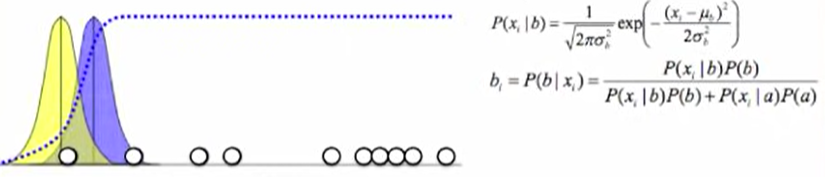

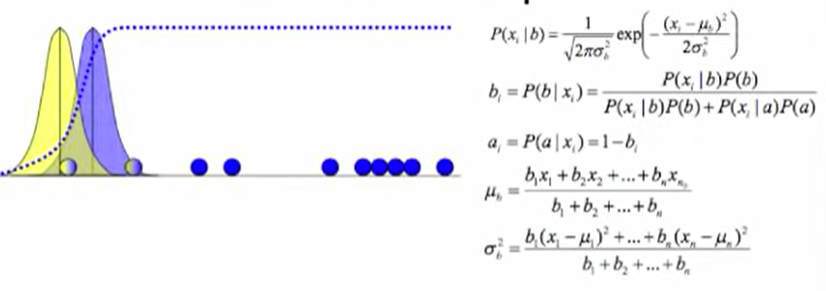

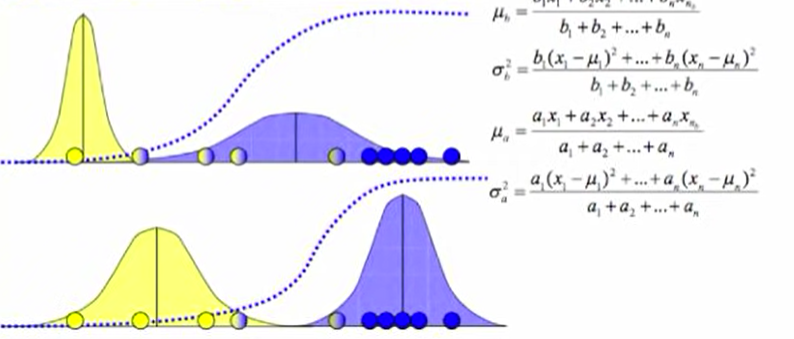

Images from: https://www.youtube.com/watch?v=iQoXFmbXRJA

In [22]:
# Sample observations from a mixture of two Gaussian distributions for demonstration
np.random.seed(42)  # For reproducibility
# True parameters for the two distributions
mu1_true, sigma1_true = 0, 1.0  # Mean and standard deviation for the first Gaussian
mu2_true, sigma2_true = 5, 1.5  # Mean and standard deviation for the second Gaussian
n_samples = 1000

# Generate samples
samples1 = np.random.normal(mu1_true, sigma1_true, n_samples // 2)
samples2 = np.random.normal(mu2_true, sigma2_true, n_samples // 2)
observations = np.concatenate([samples1, samples2])

# Initial parameter estimates
mu1_estimate, sigma1_estimate = -1, 1.2
mu2_estimate, sigma2_estimate = 6, 1.0
pi_estimate = 0.1  # Initial guess for the mixing coefficient

def gaussian_pdf(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

for iteration in range(max_iterations):
    # E-step: Calculate responsibilities (posterior probabilities)
    weight1 = pi_estimate * gaussian_pdf(observations, mu1_estimate, sigma1_estimate)
    weight2 = (1 - pi_estimate) * gaussian_pdf(observations, mu2_estimate, sigma2_estimate)
    responsibility1 = weight1 / (weight1 + weight2)
    responsibility2 = weight2 / (weight1 + weight2)

    # M-step: Update parameters
    mu1_estimate = np.sum(responsibility1 * observations) / np.sum(responsibility1)
    sigma1_estimate = np.sqrt(np.sum(responsibility1 * (observations - mu1_estimate)**2) / np.sum(responsibility1))
    mu2_estimate = np.sum(responsibility2 * observations) / np.sum(responsibility2)
    sigma2_estimate = np.sqrt(np.sum(responsibility2 * (observations - mu2_estimate)**2) / np.sum(responsibility2))
    pi_estimate = np.mean(responsibility1)

    # Convergence check could be added here based on changes in parameter estimates

mu1_estimate, sigma1_estimate, mu2_estimate, sigma2_estimate, pi_estimate

(-0.022035851991524073,
 0.9481340941109411,
 5.007860525266664,
 1.4996896795641772,
 0.4931656149808209)

# **Logistic Regression**

Logistic regression is a statistical method for predicting binary outcomes from data. Examples of this include predicting whether an email is spam or not spam, or if a tumor is malignant or benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

## Iris Setosa and Iris Versicolor

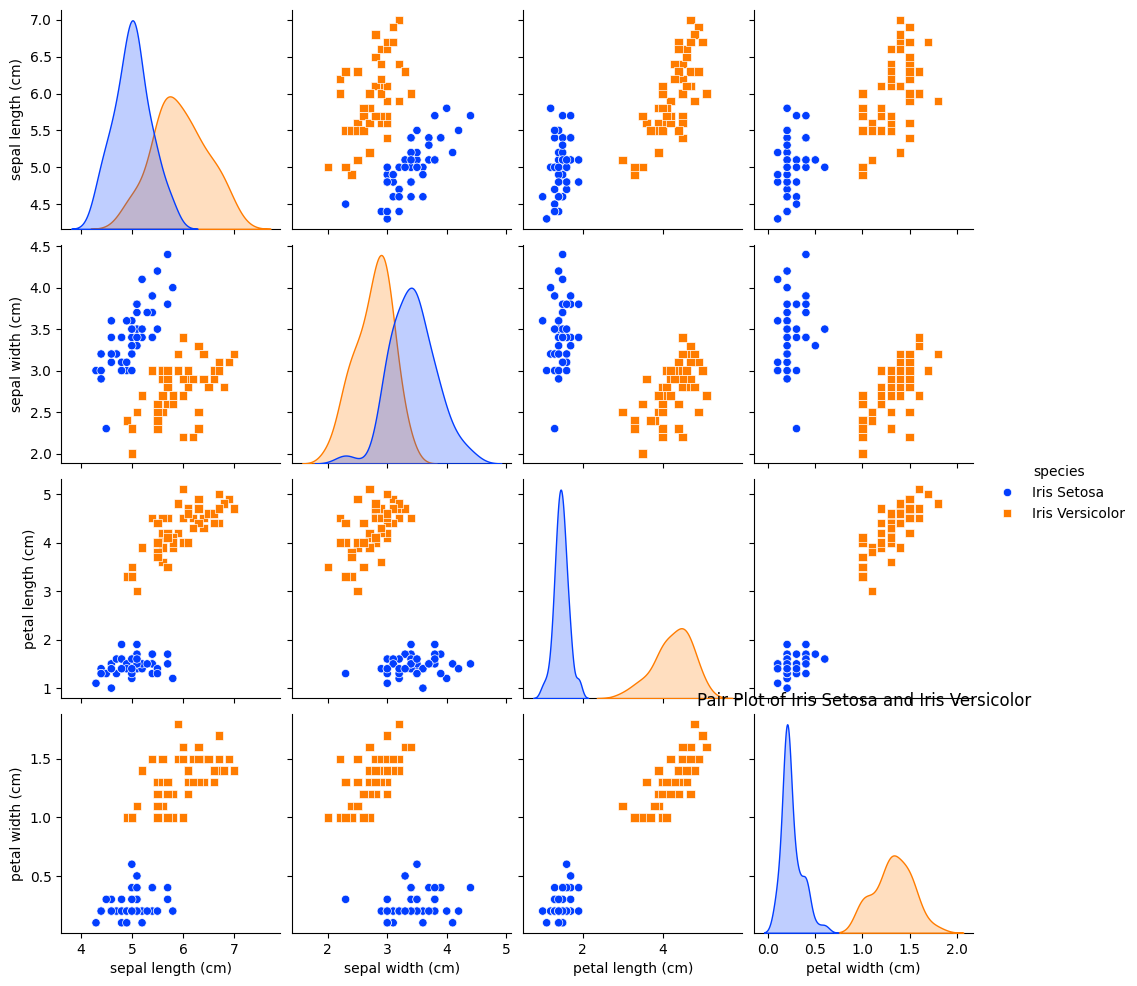

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(X, columns=iris.feature_names)

# Simplify to include only Iris Setosa and Iris Versicolor for binary classification
# Exclude Iris Virginica (class label 2)
iris_df = iris_df[y != 2]
species = y[y != 2]
species_names = {0: 'Iris Setosa', 1: 'Iris Versicolor'}
iris_df['species'] = [species_names[label] for label in species]

# Pair plot
sns.pairplot(iris_df, hue='species', markers=["o", "s"], palette='bright')
plt.title('Pair Plot of Iris Setosa and Iris Versicolor')
plt.show()

Pair plot that shows the pairwise relationships in the dataset, distinguished by species. Each plot provides insights into how the features compare across the two types of Iris flowers, with different shapes and colors representing each species.

The diagonal plots in a pair plot serve to show the distribution of each variable on its own (probability density or frequency vs the feature). They allow you to quickly see the range of values that each feature can take and how those values are distributed, including aspects like:

1. The central tendency (mean or median) of the feature.
2. The spread or variability of the feature.
3. The presence of multiple modes (peaks) in the data.
4. The presence of skewness in the distribution.

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Simplify to a binary classification problem
X = X[y != 2]  # Exclude Iris Virginica
y = y[y != 2]  # Exclude Iris Virginica

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
# Many optimization algorithms used in machine learning, such as gradient descent,
# converge much faster when features are on the same scale. Without scaling,
# features with larger values dominate the objective function, leading to slower convergence towards the optimum.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model
model = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Evaluation
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy: 1.0
Confusion Matrix: 
[[17  0]
 [ 0 13]]


Confusion Matrix:

Predicted: No	Predicted: Yes

Actual: No	TN	FP

Actual: Yes	FN	TP

Solvers: Logistic regression involves solving an optimization problem to minimize a cost function (usually the logistic loss function) that describes the difference between the observed training outcomes and the predictions made by the model. Different solvers use different optimization algorithms, each with its strengths and weaknesses, and each being more suitable for specific types of datasets and logistic regression problem setups.

We used liblinear which uses a coordinate descent algorithm. It is good for small datasets and binary classification problems, and does not support multinomial logistic regression natively but can be used for one-vs-rest (OvR) schemes. Others: newton-cg, sag

## Customer Churn

Predict whether a customer will churn based on various features such as customer service calls, contract type, monthly charges, and tenure with the company.

Customer churn, also known as customer attrition, refers to when a customer stops doing business with a company. Predicting churn is critical for businesses to take proactive steps to retain customers and understand the factors influencing customer decisions.

What if you have numeric and categorical features?

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Create synthetic dataset
np.random.seed(42)
n_customers = 10000
tenure = np.random.randint(1, 72, n_customers)
monthly_charges = np.random.uniform(29.85, 120.65, n_customers)
total_charges = tenure * monthly_charges
customer_service_calls = np.random.randint(0, 10, n_customers)
contract_types = np.random.choice(['Month-to-month', 'One year', 'Two year'], n_customers)
payment_methods = np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_customers)
internet_service = np.random.choice(['DSL', 'Fiber optic', 'No'], n_customers)
additional_services = np.random.choice(['Yes', 'No'], (n_customers, 6))
churn = np.random.choice([0, 1], n_customers)

df = pd.DataFrame({
    'Tenure': tenure,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'CustomerServiceCalls': customer_service_calls,
    'Contract': contract_types,
    'PaymentMethod': payment_methods,
    'InternetService': internet_service,
    'OnlineSecurity': additional_services[:, 0],
    'OnlineBackup': additional_services[:, 1],
    'DeviceProtection': additional_services[:, 2],
    'TechSupport': additional_services[:, 3],
    'StreamingTV': additional_services[:, 4],
    'StreamingMovies': additional_services[:, 5],
    'Churn': churn
})

# Preprocessing steps
numeric_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'CustomerServiceCalls']
numeric_transformer = StandardScaler()

categorical_features = ['Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
categorical_transformer = OneHotEncoder()

# This is a utility that orchestrates both preprocessing steps.
# It applies the appropriate transformations to each column of the dataset: the StandardScaler to numeric features and the OneHotEncoder to categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), # are simply names assigned
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the logistic regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])

# Splitting dataset
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy: 0.493
Confusion Matrix: 
[[598 392]
 [622 388]]


Features:

1. Numeric Features: These are features that represent quantitative measurements, like 'Tenure', 'MonthlyCharges', 'TotalCharges', and 'CustomerServiceCalls'. Numeric features often require scaling to ensure that the model treats them appropriately, without biasing towards features with naturally larger values.
2. Categorical Features: These represent qualitative data, such as 'Contract' type or 'PaymentMethod'. Categorical data usually need to be encoded into a numeric format that a machine learning model can understand, often through a process called one-hot encoding.

Preprocessors:
Two preprocessors are defined for handling these different types of data:

1. StandardScaler for Numeric Features: This scaler removes the mean and scales the features to unit variance. This preprocessing step is crucial for many machine learning algorithms that are sensitive to the scale of features, including logistic regression.
2. OneHotEncoder for Categorical Features: This encoder transforms categorical variables into a form that could be provided to ML algorithms to do a better job in prediction. It converts each category value into a new binary column (0s and 1s), allowing the model to understand and use categorical data.